In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import keras
#from keras.models import Sequential
#from keras.layers import Dense

import tensorflow as tf
from tensorflow import keras
import keras.utils.np_utils as ku
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

#from keras.layers.convolutional import Conv2D#, MaxPool2D
keras.__version__

C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

'2.2.4-tf'

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
# Label column and pixel columns of training dataset
train_y = df_train.iloc[:, 0]
train_x = df_train.iloc[:, 1:].values

# Pixel data of test dataset
test = df_test.iloc[:, 0:].values

train_x = train_x/255.
test = test/255.

train_x = train_x.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

# Check labels of train data
train_y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

<IPython.core.display.Javascript object>


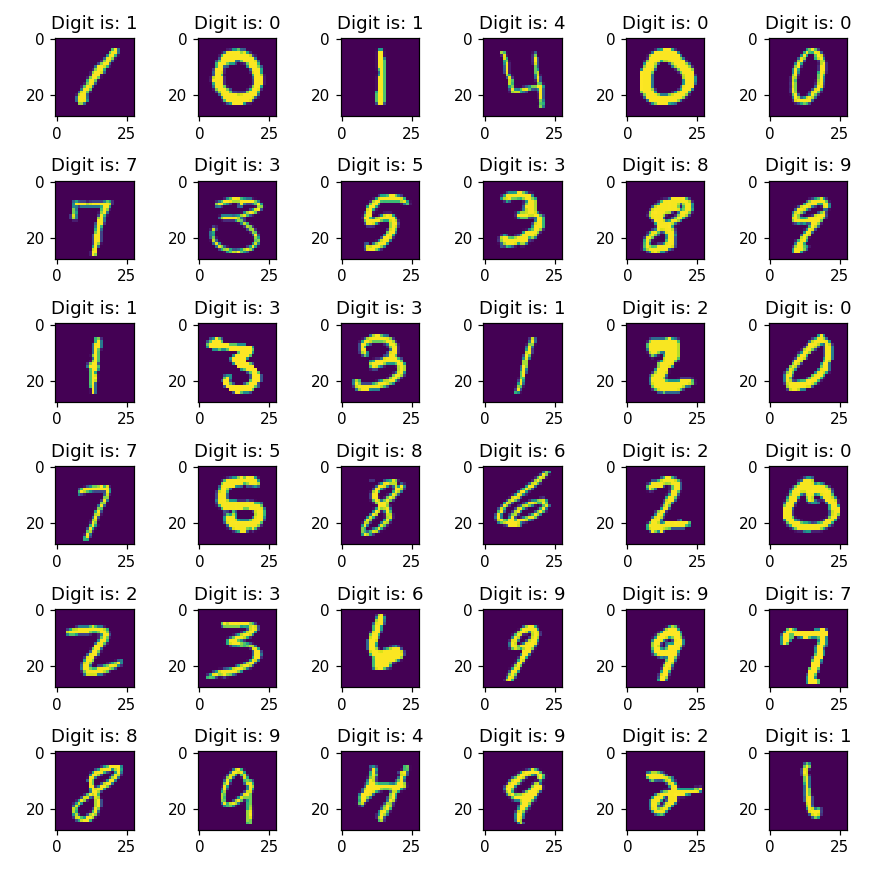

In [7]:
# Let's visualize first 36 labels of training dataset
%matplotlib notebook
plt.figure(figsize = (8, 8))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.imshow(train_x[i][:, :, 0])
    plt.title('Digit is: {}'.format(train_y.values[i]))
plt.tight_layout()

In [5]:
# Change labels to one hot encoded:
train_y_hot = keras.utils.to_categorical(train_y)
train_y_hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [8]:
# Create Keras Callbacks for learning rate
my_callbacks_lr = [LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)]

### Optimum number of filters

In [72]:
# Let's start with a simple 2 convlutional layers
# In this part we try different number of filters to see what is the optimum number of filters
N = 4 # number of try
model = [0] * N
filter_number = [12*i + 12 for i in range(4)]
for i, f in zip(range(N), filter_number):
    
    #Initialising convlutional Neuran Network
    model[i] = Sequential()

    # step 1: 1st Convlution layer
    model[i].add(Conv2D(f,kernel_size = 5,activation='relu', input_shape=(28,28,1)))
    model[i].add(MaxPool2D())

    # Step 2: A second Convlutional layer
    # New layers make the NN deeper and might help improving the accuracy of the NN
    model[i].add(Conv2D(2*f,kernel_size=5,activation='relu'))
    model[i].add(MaxPool2D())

    # step 3: Flattening
    model[i].add(Flatten())

    # step 4: Full connection 
    model[i].add(Dense(128, activation='relu'))
    model[i].add(Dense(10, activation='softmax'))

    # Compile the model
    model[i].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


    # Model summary
    model[i].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 12)        312       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 12)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 24)          7224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 24)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               49280     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total para

In [8]:
result = [0] * N
for i in range(4): 
    # Fitting CNN to training dataset
    result[i] = model[i].fit(x = train_x,
              y = train_y_hot,
              epochs = 20,
              batch_size= 32, 
              verbose= 1, 
              callbacks= my_callbacks_lr,
              validation_split= 0.2,
              shuffle= True)

Train on 33600 samples, validate on 8400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
33600/33600 [==============================] - 101s 3ms/sample - loss: 0.1453 - acc: 0.9553 - val_loss: 0.0516 - val_acc: 0.9825
Epoch 2/20
33600/33600 [==============================] - 101s 3ms/sample - loss: 0.0464 - acc: 0.9849 - val_loss: 0.0602 - val_acc: 0.9811
Epoch 3/20
33600/33600 [==============================] - 85s 3ms/sample - loss: 0.0268 - acc: 0.9915 - val_loss: 0.0621 - val_acc: 0.9821
Epoch 4/20
33600/33600 [==============================] - 63s 2ms/sample - loss: 0.0197 - acc: 0.9934 - val_loss: 0.0440 - val_acc: 0.9874
Epoch 5/20
33600/33600 [==============================] - 83s 2ms/sample - loss: 0.0111 - acc: 0.9965 - val_loss: 0.0482 - val_acc: 0.9879
Epoch 6/20
33600/33600 [==============================] - 99s 3ms/sample - loss: 0.0095 - acc: 0.9971 - val_loss: 0.0448 - val_acc: 0.9887
Epoch 7/20
33600/33600 [==============================] - 100s 3ms/

In [93]:
for i, filter in zip(range(N), filter_number):
    print('For {} filter the max val_acc is {:.4f}'.format(filter , max(result[i].history['val_acc'])))


For 12 filter the max val_acc is 0.9907


<IPython.core.display.Javascript object>


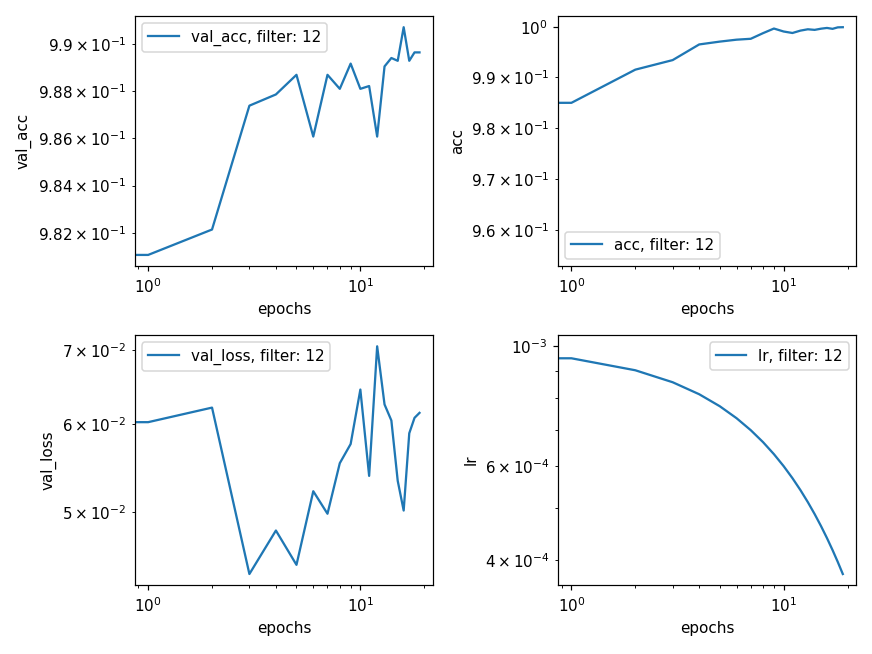

In [92]:
%matplotlib notebook
plt.figure(figsize = (8, 6))
for i, acc in zip(range(4), ['val_acc', 'acc', 'val_loss', 'lr']):
    for j, label in zip(range(N), filter_number):
        plt.subplot(2, 2, i+1)
        plt.plot(result[j].history[acc], label = acc + ', filter: ' + str(label))
        plt.ylabel(acc)
        plt.xlabel('epochs')
        plt.legend()
        plt.semilogx()
        plt.semilogy()
plt.tight_layout()



In [46]:
def prediction_submission(model, file_name):
    # Predictions
    predictions = model.predict(test)
    predictions_num = np.argmax(predictions, axis = 1)

    # create submission file
    answer = pd.DataFrame({'ImageId': list(range(1, len(predictions) + 1)), 'Label': 
                          np.argmax(predictions, axis = 1)})
    answer.to_csv(file_name + '.csv', index = False, header=True)

In [48]:
prediction_submission(model[1], '24_48_filter')

### Optimum learning rate

In [24]:
# We use 24-48 filters    
#Initialising convlutional Neuran Network
def create_model():
    model = Sequential()

    # step 1: 1st Convlution layer
    model.add(Conv2D(24,kernel_size = 5,activation='relu', padding = 'same',input_shape=(28,28,1)))
    model.add(MaxPool2D())

    # Step 2: A second Convlutional layer
    # New layers make the NN deeper and might help improving the accuracy of the NN
    model.add(Conv2D(48,kernel_size=5,activation='relu', padding = 'same'))
    model.add(MaxPool2D())

    # step 3: Flattening
    model.add(Flatten())

    # step 4: Full connection 
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

model = create_model()

# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 24)        624       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 14, 48)        28848     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 7, 7, 48)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 2352)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               301184    
_________________________________________________________________
dense_45 (Dense)             (None, 10)                1290      
Total para

In [25]:
def save_model_result(result, i, file_name):
    df = pd.DataFrame([])
    df['loss'] = result.history['loss']
    df['acc'] = result.history['acc']
    df['val_loss'] = result.history['val_loss']
    df['val_acc'] = result.history['val_acc']
    df['lr'] = result.history['lr']
    df.to_csv('history_experiment/history_of_model_{:.2f}'.format(i) + '.txt', sep = '\t', index = False)

<IPython.core.display.Javascript object>


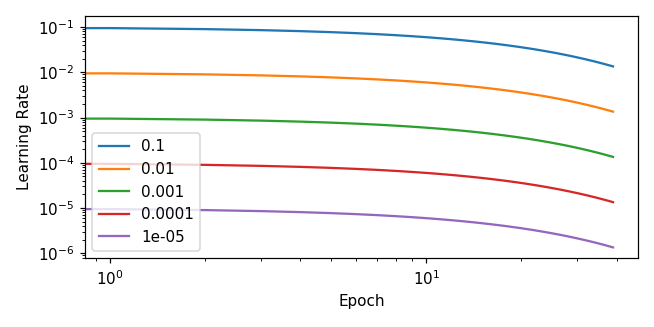

In [26]:
# Viualize learning rates
%matplotlib notebook
plt.figure(figsize=(6,3))
N = 5
for i in range(N): 
    lr_factor = 10**(-i-1)
    learning_rate = [lr_factor * 0.95 ** x for x in range(40)]
    plt.plot(range(40), learning_rate, label = str(lr_factor))
plt.legend()
plt.semilogx()
plt.semilogy()
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.tight_layout()

In [28]:
# We try 5 different learning rates
result = [0] * N

for i in range(N): 
    lr_factor = 10**(-i-1) 
    my_callbacks_lr = [LearningRateScheduler(lambda x: lr_factor * 0.95 ** x, verbose=0)]
    model = create_model()
    # Fitting CNN to training dataset
    result[i] = model.fit(x = train_x,
              y = train_y_hot,
              epochs = 20,
              batch_size= 32, 
              verbose= 1, 
              callbacks= my_callbacks_lr,
              validation_split= 0.2,
              shuffle= True)
    
    # Save the entire model as a SavedModel.
    !mkdir -new saved_model_CNN
    model.save('saved_model_CNN/my_model_lr_' + str(lr_factor) + str(i))
    # Save history of model
    save_model_result(result[i], i, 'lr_' + str(lr_factor))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 53s 2ms/sample - loss: 14.5445 - acc: 0.0968 - val_loss: 14.5619 - val_acc: 0.0965
Epoch 2/20
33600/33600 [==============================] - 52s 2ms/sample - loss: 14.5538 - acc: 0.0971 - val_loss: 14.5619 - val_acc: 0.0965
Epoch 3/20
33600/33600 [==============================] - 52s 2ms/sample - loss: 14.5538 - acc: 0.0971 - val_loss: 14.5619 - val_acc: 0.0965
Epoch 4/20
33600/33600 [==============================] - 52s 2ms/sample - loss: 14.5538 - acc: 0.0971 - val_loss: 14.5619 - val_acc: 0.0965
Epoch 5/20
33600/33600 [==============================] - 54s 2ms/sample - loss: 14.5538 - acc: 0.0971 - val_loss: 14.5619 - val_acc: 0.0965
Epoch 6/20
33600/33600 [==============================] - 60s 2ms/sample - loss: 14.5538 - acc: 0.0971 - val_loss: 14.5619 - val_acc: 0.0965
Epoch 7/20
33600/33600 [==============================] - 60s 2ms/sample - loss: 14.5538 - acc: 0.0971 - 

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 60s 2ms/sample - loss: 0.1964 - acc: 0.9404 - val_loss: 0.0954 - val_acc: 0.9726
Epoch 2/20
33600/33600 [==============================] - 59s 2ms/sample - loss: 0.0864 - acc: 0.9748 - val_loss: 0.0996 - val_acc: 0.9688
Epoch 3/20
33600/33600 [==============================] - 59s 2ms/sample - loss: 0.0847 - acc: 0.9752 - val_loss: 0.1038 - val_acc: 0.9737
Epoch 4/20
33600/33600 [==============================] - 57s 2ms/sample - loss: 0.0760 - acc: 0.9784 - val_loss: 0.0731 - val_acc: 0.9777
Epoch 5/20
33600/33600 [==============================] - 57s 2ms/sample - loss: 0.0587 - acc: 0.9831 - val_loss: 0.0996 - val_acc: 0.9726
Epoch 6/20
33600/33600 [==============================] - 57s 2ms/sample - loss: 0.0525 - acc: 0.9855 - val_loss: 0.1024 - val_acc: 0.9745
Epoch 7/20
33600/33600 [==============================] - 55s 2ms/sample - loss: 0.0551 - acc: 0.9846 - val_loss: 0.0

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 64s 2ms/sample - loss: 0.1675 - acc: 0.9470 - val_loss: 0.0523 - val_acc: 0.9826
Epoch 2/20
33600/33600 [==============================] - 61s 2ms/sample - loss: 0.0475 - acc: 0.9855 - val_loss: 0.0430 - val_acc: 0.9857
Epoch 3/20
33600/33600 [==============================] - 61s 2ms/sample - loss: 0.0324 - acc: 0.9893 - val_loss: 0.0449 - val_acc: 0.9871
Epoch 4/20
33600/33600 [==============================] - 61s 2ms/sample - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0508 - val_acc: 0.9858
Epoch 5/20
33600/33600 [==============================] - 61s 2ms/sample - loss: 0.0152 - acc: 0.9948 - val_loss: 0.0370 - val_acc: 0.9902
Epoch 6/20
33600/33600 [==============================] - 62s 2ms/sample - loss: 0.0103 - acc: 0.9967 - val_loss: 0.0583 - val_acc: 0.9863
Epoch 7/20
33600/33600 [==============================] - 61s 2ms/sample - loss: 0.0094 - acc: 0.9970 - val_loss: 0.0

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 61s 2ms/sample - loss: 0.4334 - acc: 0.8834 - val_loss: 0.1635 - val_acc: 0.9521
Epoch 2/20
33600/33600 [==============================] - 60s 2ms/sample - loss: 0.1350 - acc: 0.9594 - val_loss: 0.1209 - val_acc: 0.9639
Epoch 3/20
33600/33600 [==============================] - 60s 2ms/sample - loss: 0.0947 - acc: 0.9717 - val_loss: 0.0822 - val_acc: 0.9754
Epoch 4/20
33600/33600 [==============================] - 60s 2ms/sample - loss: 0.0733 - acc: 0.9781 - val_loss: 0.0714 - val_acc: 0.9777
Epoch 5/20
33600/33600 [==============================] - 60s 2ms/sample - loss: 0.0606 - acc: 0.9818 - val_loss: 0.0595 - val_acc: 0.9817
Epoch 6/20
33600/33600 [==============================] - 60s 2ms/sample - loss: 0.0510 - acc: 0.9850 - val_loss: 0.0539 - val_acc: 0.9823
Epoch 7/20
33600/33600 [==============================] - 60s 2ms/sample - loss: 0.0444 - acc: 0.9871 - val_loss: 0.0

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 60s 2ms/sample - loss: 1.6597 - acc: 0.6478 - val_loss: 0.8380 - val_acc: 0.8214
Epoch 2/20
33600/33600 [==============================] - 59s 2ms/sample - loss: 0.5903 - acc: 0.8526 - val_loss: 0.4375 - val_acc: 0.8830
Epoch 3/20
33600/33600 [==============================] - 59s 2ms/sample - loss: 0.3903 - acc: 0.8939 - val_loss: 0.3321 - val_acc: 0.9082
Epoch 4/20
33600/33600 [==============================] - 59s 2ms/sample - loss: 0.3189 - acc: 0.9107 - val_loss: 0.2828 - val_acc: 0.9235
Epoch 5/20
33600/33600 [==============================] - 59s 2ms/sample - loss: 0.2789 - acc: 0.9212 - val_loss: 0.2521 - val_acc: 0.9282
Epoch 6/20
33600/33600 [==============================] - 59s 2ms/sample - loss: 0.2520 - acc: 0.9276 - val_loss: 0.2290 - val_acc: 0.9342
Epoch 7/20
33600/33600 [==============================] - 59s 2ms/sample - loss: 0.2314 - acc: 0.9329 - val_loss: 0.2

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


In [33]:
for i in range(N):
    lr_factor = 10**(-i-1)
    print('For {} learning factor the max val_acc is {:.4f}'.format(lr_factor , max(result[i].history['val_acc'])))

For 0.1 learning factor the max val_acc is 0.0965
For 0.01 learning factor the max val_acc is 0.9863
For 0.001 learning factor the max val_acc is 0.9937
For 0.0001 learning factor the max val_acc is 0.9890
For 1e-05 learning factor the max val_acc is 0.9623


<IPython.core.display.Javascript object>


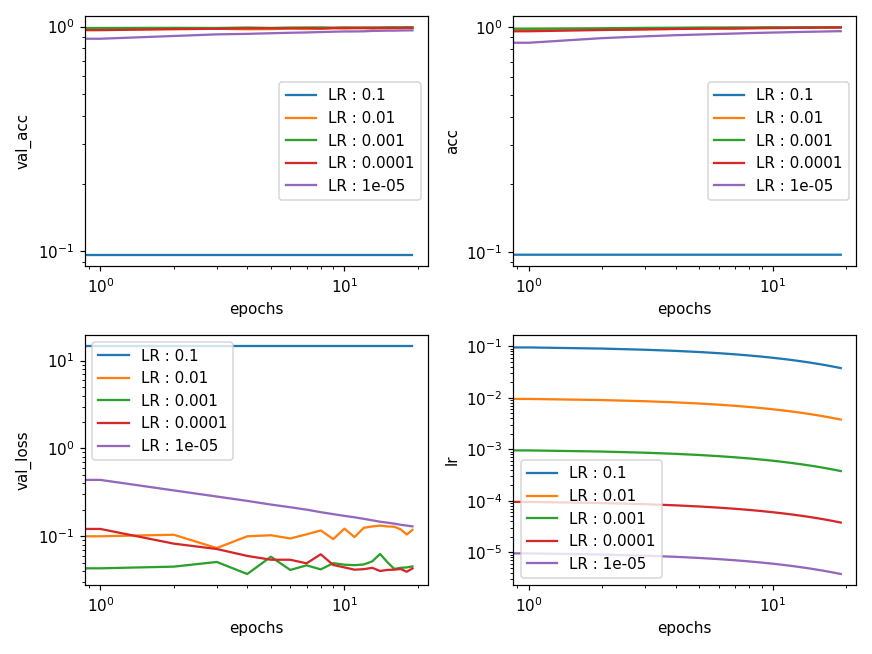

C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instanc

In [32]:
%matplotlib notebook
plt.figure(figsize = (8, 6))
for i, label in zip(range(4), ['val_acc', 'acc', 'val_loss', 'lr']):
    for j in range(N):
        lr_factor = 10**(-j-1)
        plt.subplot(2, 2, i+1)
        plt.plot(result[j].history[label], label = 'LR : ' + str(lr_factor))
        plt.ylabel(label)
        plt.xlabel('epochs')
        plt.semilogx()
        plt.semilogy()
        plt.legend()
plt.tight_layout()

### Kernel size 3 or 5?

In [34]:
N = 2 # number of try
model = [0] * N
kernel_size = [3, 5]
for i, ks in zip(range(N), kernel_size):
    
    #Initialising convlutional Neuran Network
    model[i] = Sequential()

    # step 1: 1st Convlution layer
    model[i].add(Conv2D(24,kernel_size = ks,activation='relu', input_shape=(28,28,1)))
    model[i].add(MaxPool2D())

    # Step 2: A second Convlutional layer
    # New layers make the NN deeper and might help improving the accuracy of the NN
    model[i].add(Conv2D(48,kernel_size=ks,activation='relu'))
    model[i].add(MaxPool2D())

    # step 3: Flattening
    model[i].add(Flatten())

    # step 4: Full connection 
    model[i].add(Dense(128, activation='relu'))
    model[i].add(Dense(10, activation='softmax'))

    # Compile the model
    model[i].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


    # Model summary
    model[i].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 11, 11, 48)        10416     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               153728    
_________________________________________________________________
dense_59 (Dense)             (None, 10)                1290      
Total para

In [46]:
# We try 5 different learning rates
result = [0] * N
my_callbacks_lr = [LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)]

for i, ks in zip(range(N), kernel_size): 
    # Fitting CNN to training dataset
    result[i] = model[i].fit(x = train_x,
              y = train_y_hot,
              epochs = 20,
              batch_size= 32, 
              verbose= 1, 
              callbacks= my_callbacks_lr,
              validation_split= 0.2,
              shuffle= True)
    
    # Save the entire model as a SavedModel.
    !mkdir -new saved_model_CNN
    model[i].save('saved_model_CNN/my_model_kernel_size_' + str(ks))
    # Save history of model
    save_model_result(result[i], i, 'kernel_size_' + str(ks))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 27s 795us/sample - loss: 0.0373 - acc: 0.9884 - val_loss: 0.0590 - val_acc: 0.9824
Epoch 2/20
33600/33600 [==============================] - 30s 907us/sample - loss: 0.0263 - acc: 0.9908 - val_loss: 0.0511 - val_acc: 0.9864
Epoch 3/20
33600/33600 [==============================] - 26s 759us/sample - loss: 0.0193 - acc: 0.9937 - val_loss: 0.0453 - val_acc: 0.9890
Epoch 4/20
33600/33600 [==============================] - 27s 792us/sample - loss: 0.0138 - acc: 0.9959 - val_loss: 0.0615 - val_acc: 0.9846
Epoch 5/20
33600/33600 [==============================] - 25s 758us/sample - loss: 0.0112 - acc: 0.9963 - val_loss: 0.0443 - val_acc: 0.9882
Epoch 6/20
33600/33600 [==============================] - 25s 757us/sample - loss: 0.0084 - acc: 0.9972 - val_loss: 0.0476 - val_acc: 0.9898
Epoch 7/20
33600/33600 [==============================] - 25s 749us/sample - loss: 0.0062 - acc: 0.9979 -

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


33600/33600 [==============================] - 29s 859us/sample - loss: 0.0366 - acc: 0.9885 - val_loss: 0.0400 - val_acc: 0.9881
Epoch 2/20
33600/33600 [==============================] - 30s 897us/sample - loss: 0.0261 - acc: 0.9918 - val_loss: 0.0435 - val_acc: 0.9869
Epoch 3/20
33600/33600 [==============================] - 28s 841us/sample - loss: 0.0186 - acc: 0.9935 - val_loss: 0.0425 - val_acc: 0.9881
Epoch 4/20
33600/33600 [==============================] - 30s 883us/sample - loss: 0.0138 - acc: 0.9956 - val_loss: 0.0412 - val_acc: 0.9896
Epoch 5/20
33600/33600 [==============================] - 28s 829us/sample - loss: 0.0106 - acc: 0.9967 - val_loss: 0.0463 - val_acc: 0.9892
Epoch 6/20
33600/33600 [==============================] - 28s 836us/sample - loss: 0.0090 - acc: 0.9968 - val_loss: 0.0457 - val_acc: 0.9894
Epoch 7/20
33600/33600 [==============================] - 28s 834us/sample - loss: 0.0070 - acc: 0.9978 - val_loss: 0.0473 - val_acc: 0.9889
Epoch 8/20
33600/33600 [

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


In [47]:
for i, ks in zip(range(N), kernel_size):
    print('For kernel size: {} the max val_acc is {:.4f}'.format(ks , max(result[i].history['val_acc'])))

For kernel size: 3 the max val_acc is 0.9913
For kernel size: 5 the max val_acc is 0.9926


### Fully connected layer nodes

In [50]:
N = 4 # number of try
model = [0] * N
result = [0] * N
for i in range(N):
    
    #Initialising convlutional Neuran Network
    model[i] = Sequential()

    # step 1: 1st Convlution layer
    model[i].add(Conv2D(24,kernel_size = 5,activation='relu', input_shape=(28,28,1)))
    model[i].add(MaxPool2D())

    # Step 2: A second Convlutional layer
    # New layers make the NN deeper and might help improving the accuracy of the NN
    model[i].add(Conv2D(48,kernel_size=5,activation='relu'))
    model[i].add(MaxPool2D())

    # step 3: Flattening
    model[i].add(Flatten())

    # step 4: Full connection 
    model[i].add(Dense(2**(i + 6), activation='relu'))
    model[i].add(Dense(10, activation='softmax'))

    # Compile the model
    model[i].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


    # Model summary
    model[i].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 24, 24, 24)        624       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 12, 12, 24)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 8, 8, 48)          28848     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 4, 4, 48)          0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 64)                49216     
_________________________________________________________________
dense_71 (Dense)             (None, 10)                650       
Total para

In [59]:
my_callbacks_lr = [LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)]
for i in range(N): 
    # Fitting CNN to training dataset
    result[i] = model[i].fit(x = train_x,
              y = train_y_hot,
              epochs = 20,
              batch_size= 32, 
              verbose= 1, 
              callbacks= my_callbacks_lr,
              validation_split= 0.2,
              shuffle= True)
    
    # Save the entire model as a SavedModel.
    !mkdir -new saved_model_CNN
    model[i].save('saved_model_CNN/my_model_layer_nodes_' + str(2**(i + 6)))
    # Save history of model
    save_model_result(result[i], i, 'layer_nodes_' + str(2**(i + 6)))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 30s 904us/sample - loss: 0.1985 - acc: 0.9403 - val_loss: 0.0732 - val_acc: 0.9756
Epoch 2/20
33600/33600 [==============================] - 30s 895us/sample - loss: 0.0626 - acc: 0.9811 - val_loss: 0.0459 - val_acc: 0.9856
Epoch 3/20
33600/33600 [==============================] - 30s 890us/sample - loss: 0.0422 - acc: 0.9866 - val_loss: 0.0397 - val_acc: 0.9876
Epoch 4/20
33600/33600 [==============================] - 30s 882us/sample - loss: 0.0310 - acc: 0.9899 - val_loss: 0.0387 - val_acc: 0.9870
Epoch 5/20
33600/33600 [==============================] - 30s 888us/sample - loss: 0.0234 - acc: 0.9921 - val_loss: 0.0423 - val_acc: 0.9870
Epoch 6/20
33600/33600 [==============================] - 30s 892us/sample - loss: 0.0167 - acc: 0.9943 - val_loss: 0.0398 - val_acc: 0.9885
Epoch 7/20
33600/33600 [==============================] - 30s 904us/sample - loss: 0.0134 - acc: 0.9954 -

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


33600/33600 [==============================] - 31s 913us/sample - loss: 0.1718 - acc: 0.9471 - val_loss: 0.0736 - val_acc: 0.9767
Epoch 2/20
33600/33600 [==============================] - 30s 905us/sample - loss: 0.0548 - acc: 0.9828 - val_loss: 0.0534 - val_acc: 0.9836
Epoch 3/20
33600/33600 [==============================] - 31s 912us/sample - loss: 0.0377 - acc: 0.9883 - val_loss: 0.0410 - val_acc: 0.9875
Epoch 4/20
33600/33600 [==============================] - 30s 906us/sample - loss: 0.0267 - acc: 0.9916 - val_loss: 0.0404 - val_acc: 0.9890
Epoch 5/20
33600/33600 [==============================] - 31s 916us/sample - loss: 0.0201 - acc: 0.9939 - val_loss: 0.0380 - val_acc: 0.9905
Epoch 6/20
33600/33600 [==============================] - 31s 910us/sample - loss: 0.0135 - acc: 0.9957 - val_loss: 0.0392 - val_acc: 0.9890
Epoch 7/20
33600/33600 [==============================] - 31s 911us/sample - loss: 0.0110 - acc: 0.9963 - val_loss: 0.0447 - val_acc: 0.9876
Epoch 8/20
33600/33600 [

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


33600/33600 [==============================] - 34s 1ms/sample - loss: 0.1670 - acc: 0.9484 - val_loss: 0.0676 - val_acc: 0.9779
Epoch 2/20
33600/33600 [==============================] - 32s 945us/sample - loss: 0.0497 - acc: 0.9841 - val_loss: 0.0475 - val_acc: 0.9832
Epoch 3/20
33600/33600 [==============================] - 32s 945us/sample - loss: 0.0334 - acc: 0.9893 - val_loss: 0.0491 - val_acc: 0.9858
Epoch 4/20
33600/33600 [==============================] - 32s 947us/sample - loss: 0.0225 - acc: 0.9923 - val_loss: 0.0370 - val_acc: 0.9895
Epoch 5/20
33600/33600 [==============================] - 32s 944us/sample - loss: 0.0167 - acc: 0.9951 - val_loss: 0.0367 - val_acc: 0.9898
Epoch 6/20
33600/33600 [==============================] - 32s 949us/sample - loss: 0.0125 - acc: 0.9958 - val_loss: 0.0452 - val_acc: 0.9890
Epoch 7/20
33600/33600 [==============================] - 32s 944us/sample - loss: 0.0086 - acc: 0.9970 - val_loss: 0.0437 - val_acc: 0.9895
Epoch 8/20
33600/33600 [==

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 37s 1ms/sample - loss: 0.1507 - acc: 0.9528 - val_loss: 0.0505 - val_acc: 0.9837.1525 - 
Epoch 2/20
33600/33600 [==============================] - 36s 1ms/sample - loss: 0.0459 - acc: 0.9853 - val_loss: 0.0645 - val_acc: 0.9824
Epoch 3/20
33600/33600 [==============================] - 36s 1ms/sample - loss: 0.0303 - acc: 0.9907 - val_loss: 0.0380 - val_acc: 0.9888
Epoch 4/20
33600/33600 [==============================] - 36s 1ms/sample - loss: 0.0224 - acc: 0.9926 - val_loss: 0.0366 - val_acc: 0.9889 1s - loss: 0.0219 - acc: 0.992 - ETA: 1s - loss: 0.
Epoch 5/20
33600/33600 [==============================] - 36s 1ms/sample - loss: 0.0158 - acc: 0.9954 - val_loss: 0.0417 - val_acc: 0.9883
Epoch 6/20
33600/33600 [==============================] - 37s 1ms/sample - loss: 0.0112 - acc: 0.9965 - val_loss: 0.0312 - val_acc: 0.9910
Epoch 7/20
33600/33600 [==============================] -

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


In [60]:
for i in range(N):
    print('For {} nodes in fully connected layer the max val_acc is {:.4f}'.format(2**(i + 6) , 
                                                                                   max(result[i].history['val_acc'])))

For 64 nodes in fully connected layer the max val_acc is 0.9910
For 128 nodes in fully connected layer the max val_acc is 0.9924
For 256 nodes in fully connected layer the max val_acc is 0.9924
For 512 nodes in fully connected layer the max val_acc is 0.9935


### Dropout parameter

In [77]:
N = 6 # number of try
model = [0] * N
result = [0] * N
for i in range(N):
    #Initialising convlutional Neuran Network
    model[i] = Sequential()

    # step 1: 1st Convlution layer, contains maxpooling and dropout
    model[i].add(Conv2D(24,kernel_size = 5,activation='relu', input_shape=(28,28,1)))
    model[i].add(MaxPool2D())
    model[i].add(Dropout(0.1 * (i + 1)))

    # Step 2: A second Convlutional layer, contains maxpooling and dropout
    # New layers make the NN deeper and might help improving the accuracy of the NN
    model[i].add(Conv2D(48,kernel_size=5,activation='relu'))
    model[i].add(MaxPool2D())
    model[i].add(Dropout(0.1 * (i + 1)))

    # step 3: Flattening
    model[i].add(Flatten())

    # step 4: Full connection 
    model[i].add(Dense(128, activation='relu'))
    model[i].add(Dense(10, activation='softmax'))

    # Compile the model
    model[i].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


    # Model summary
    model[i].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_126 (Conv2D)          (None, 24, 24, 24)        624       
_________________________________________________________________
max_pooling2d_126 (MaxPoolin (None, 12, 12, 24)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 12, 12, 24)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 8, 8, 48)          28848     
_________________________________________________________________
max_pooling2d_127 (MaxPoolin (None, 4, 4, 48)          0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 4, 4, 48)          0         
_________________________________________________________________
flatten_63 (Flatten)         (None, 768)               0         
__________

In [78]:
my_callbacks_lr = [LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)]
for i in range(N): 
    # Fitting CNN to training dataset
    result[i] = model[i].fit(x = train_x,
              y = train_y_hot,
              epochs = 20,
              batch_size= 32, 
              verbose= 1, 
              callbacks= my_callbacks_lr,
              validation_split= 0.2,
              shuffle= True)
    
    # Save the entire model as a SavedModel.
    !mkdir -new saved_model_CNN
    model[i].save('saved_model_CNN/my_model_dropout_' + str(0.1 * (i + 1)))
    # Save history of model
    save_model_result(result[i], i, 'dropout_' + str(0.1 * (i + 1)))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 50s 1ms/sample - loss: 0.1957 - acc: 0.9393 - val_loss: 0.0678 - val_acc: 0.9793
Epoch 2/20
33600/33600 [==============================] - 44s 1ms/sample - loss: 0.0617 - acc: 0.9810 - val_loss: 0.0626 - val_acc: 0.9807
Epoch 3/20
33600/33600 [==============================] - 44s 1ms/sample - loss: 0.0421 - acc: 0.9860 - val_loss: 0.0436 - val_acc: 0.9863
Epoch 4/20
33600/33600 [==============================] - 44s 1ms/sample - loss: 0.0318 - acc: 0.9894 - val_loss: 0.0416 - val_acc: 0.9882
Epoch 5/20
33600/33600 [==============================] - 44s 1ms/sample - loss: 0.0250 - acc: 0.9921 - val_loss: 0.0364 - val_acc: 0.9894
Epoch 6/20
33600/33600 [==============================] - 44s 1ms/sample - loss: 0.0204 - acc: 0.9932 - val_loss: 0.0375 - val_acc: 0.9894
Epoch 7/20
33600/33600 [==============================] - 43s 1ms/sample - loss: 0.0160 - acc: 0.9947 - val_loss: 0.0

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 49s 1ms/sample - loss: 0.2140 - acc: 0.9325 - val_loss: 0.0763 - val_acc: 0.9755
Epoch 2/20
33600/33600 [==============================] - 46s 1ms/sample - loss: 0.0664 - acc: 0.9794 - val_loss: 0.0527 - val_acc: 0.9844
Epoch 3/20
33600/33600 [==============================] - 45s 1ms/sample - loss: 0.0468 - acc: 0.9854 - val_loss: 0.0430 - val_acc: 0.9867
Epoch 4/20
33600/33600 [==============================] - 46s 1ms/sample - loss: 0.0378 - acc: 0.9881 - val_loss: 0.0360 - val_acc: 0.9904
Epoch 5/20
33600/33600 [==============================] - 47s 1ms/sample - loss: 0.0300 - acc: 0.9904 - val_loss: 0.0445 - val_acc: 0.9883
Epoch 6/20
33600/33600 [==============================] - 45s 1ms/sample - loss: 0.0275 - acc: 0.9906 - val_loss: 0.0351 - val_acc: 0.9902
Epoch 7/20
33600/33600 [==============================] - 46s 1ms/sample - loss: 0.0217 - acc: 0.9926 - val_loss: 0.0

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 48s 1ms/sample - loss: 0.2185 - acc: 0.9315 - val_loss: 0.0665 - val_acc: 0.9794
Epoch 2/20
33600/33600 [==============================] - 47s 1ms/sample - loss: 0.0722 - acc: 0.9779 - val_loss: 0.0439 - val_acc: 0.9861
Epoch 3/20
33600/33600 [==============================] - 50s 1ms/sample - loss: 0.0505 - acc: 0.9837 - val_loss: 0.0350 - val_acc: 0.9894
Epoch 4/20
33600/33600 [==============================] - 50s 1ms/sample - loss: 0.0443 - acc: 0.9855 - val_loss: 0.0339 - val_acc: 0.9898
Epoch 5/20
33600/33600 [==============================] - 50s 2ms/sample - loss: 0.0387 - acc: 0.9865 - val_loss: 0.0321 - val_acc: 0.9904
Epoch 6/20
33600/33600 [==============================] - 50s 1ms/sample - loss: 0.0314 - acc: 0.9893 - val_loss: 0.0272 - val_acc: 0.9918
Epoch 7/20
33600/33600 [==============================] - 49s 1ms/sample - loss: 0.0300 - acc: 0.9905 - val_loss: 0.0

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 54s 2ms/sample - loss: 0.2780 - acc: 0.9112 - val_loss: 0.0668 - val_acc: 0.9786
Epoch 2/20
33600/33600 [==============================] - 48s 1ms/sample - loss: 0.0920 - acc: 0.9711 - val_loss: 0.0492 - val_acc: 0.9855
Epoch 3/20
33600/33600 [==============================] - 48s 1ms/sample - loss: 0.0669 - acc: 0.9790 - val_loss: 0.0434 - val_acc: 0.9862
Epoch 4/20
33600/33600 [==============================] - 48s 1ms/sample - loss: 0.0557 - acc: 0.9816 - val_loss: 0.0351 - val_acc: 0.9889
Epoch 5/20
33600/33600 [==============================] - 48s 1ms/sample - loss: 0.0504 - acc: 0.9839 - val_loss: 0.0303 - val_acc: 0.9906
Epoch 6/20
33600/33600 [==============================] - 49s 1ms/sample - loss: 0.0444 - acc: 0.9855 - val_loss: 0.0328 - val_acc: 0.9896
Epoch 7/20
33600/33600 [==============================] - 49s 1ms/sample - loss: 0.0383 - acc: 0.9875 - val_loss: 0.0

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 53s 2ms/sample - loss: 0.3194 - acc: 0.8966 - val_loss: 0.0872 - val_acc: 0.9724
Epoch 2/20
33600/33600 [==============================] - 55s 2ms/sample - loss: 0.1153 - acc: 0.9645 - val_loss: 0.0608 - val_acc: 0.9795
Epoch 3/20
33600/33600 [==============================] - 55s 2ms/sample - loss: 0.0917 - acc: 0.9718 - val_loss: 0.0477 - val_acc: 0.9845
Epoch 4/20
33600/33600 [==============================] - 54s 2ms/sample - loss: 0.0763 - acc: 0.9766 - val_loss: 0.0359 - val_acc: 0.9895
Epoch 5/20
33600/33600 [==============================] - 55s 2ms/sample - loss: 0.0636 - acc: 0.9798 - val_loss: 0.0421 - val_acc: 0.9864
Epoch 6/20
33600/33600 [==============================] - 54s 2ms/sample - loss: 0.0623 - acc: 0.9805 - val_loss: 0.0327 - val_acc: 0.9905
Epoch 7/20
33600/33600 [==============================] - 55s 2ms/sample - loss: 0.0539 - acc: 0.9827 - val_loss: 0.0

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 51s 2ms/sample - loss: 0.4011 - acc: 0.8690 - val_loss: 0.0996 - val_acc: 0.9714
Epoch 2/20
33600/33600 [==============================] - 54s 2ms/sample - loss: 0.1512 - acc: 0.9514 - val_loss: 0.0569 - val_acc: 0.9802
Epoch 3/20
33600/33600 [==============================] - 54s 2ms/sample - loss: 0.1183 - acc: 0.9631 - val_loss: 0.0532 - val_acc: 0.9839
Epoch 4/20
33600/33600 [==============================] - 52s 2ms/sample - loss: 0.1000 - acc: 0.9689 - val_loss: 0.0453 - val_acc: 0.9865
Epoch 5/20
33600/33600 [==============================] - 53s 2ms/sample - loss: 0.0889 - acc: 0.9713 - val_loss: 0.0435 - val_acc: 0.9874
Epoch 6/20
33600/33600 [==============================] - 52s 2ms/sample - loss: 0.0846 - acc: 0.9729 - val_loss: 0.0357 - val_acc: 0.9889
Epoch 7/20
33600/33600 [==============================] - 51s 2ms/sample - loss: 0.0767 - acc: 0.9747 - val_loss: 0.0

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


In [79]:
for i in range(N):
    print('For {:.2f} dropout parameter the max val_acc is {:.4f}'.format(0.1*(i + 1) , 
                                                                                   max(result[i].history['val_acc'])))

For 0.10 dropout parameter the max val_acc is 0.9923
For 0.20 dropout parameter the max val_acc is 0.9931
For 0.30 dropout parameter the max val_acc is 0.9936
For 0.40 dropout parameter the max val_acc is 0.9932
For 0.50 dropout parameter the max val_acc is 0.9933
For 0.60 dropout parameter the max val_acc is 0.9935


### Replace Maxpooling with conv and use padding

In [90]:
"""
Let's replace maxpooling layer with conv layer.
In order to reduce the output shape to (4,4, 48), I changed 1st layer kernel size to 3 and used padding = 'Same'.
Then I replace Maxpolling layer with a convolutional layer with kernel size of 5.
In the 2nd version I used padding = 'Same' in 2nd layer insted of the 1st fine. 
Note in this version the output shape would be (6,6,48).
"""

N = 2 # number of try
model = [0] * N
result = [0] * N
for i in range(N):
    
    #Initialising convlutional Neuran Network
    model[i] = Sequential()
    if i ==0:
        # step 1: 1st Convlution layer, contains maxpooling and dropout
        model[i].add(Conv2D(24,kernel_size = 3, activation='relu', padding = 'same', input_shape=(28,28,1)))
        model[i].add(Conv2D(24,kernel_size = 5, activation='relu', strides = 2))
        model[i].add(Dropout(0.3))

        # Step 2: A second Convlutional layer, contains maxpooling and dropout
        # New layers make the NN deeper and might help improving the accuracy of the NN
        model[i].add(Conv2D(48,kernel_size=3, activation='relu', padding = 'same'))
        model[i].add(Conv2D(48,kernel_size=5,activation='relu', strides = 2))
        model[i].add(Dropout(0.3))
    else:
        # step 1: 1st Convlution layer, contains maxpooling and dropout
        model[i].add(Conv2D(24,kernel_size = 3, activation='relu', input_shape=(28,28,1)))
        model[i].add(Conv2D(24,kernel_size = 5, activation='relu', strides = 2, padding = 'same'))
        model[i].add(Dropout(0.3))

        # Step 2: A second Convlutional layer, contains maxpooling and dropout
        # New layers make the NN deeper and might help improving the accuracy of the NN
        model[i].add(Conv2D(48,kernel_size=3, activation='relu'))
        model[i].add(Conv2D(48,kernel_size=5,activation='relu', strides = 2, padding = 'same'))
        model[i].add(Dropout(0.3))
        

    # step 3: Flattening
    model[i].add(Flatten())

    # step 4: Full connection 
    model[i].add(Dense(128, activation='relu'))
    model[i].add(Dense(10, activation='softmax'))

    # Compile the model
    model[i].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


    # Model summary
    model[i].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_150 (Conv2D)          (None, 28, 28, 24)        240       
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 12, 12, 24)        14424     
_________________________________________________________________
dropout_66 (Dropout)         (None, 12, 12, 24)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 12, 12, 48)        10416     
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 4, 4, 48)          57648     
_________________________________________________________________
dropout_67 (Dropout)         (None, 4, 4, 48)          0         
_________________________________________________________________
flatten_72 (Flatten)         (None, 768)               0         
__________

In [91]:
my_callbacks_lr = [LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)]
for i in range(N): 
    # Fitting CNN to training dataset
    result[i] = model[i].fit(x = train_x,
              y = train_y_hot,
              epochs = 20,
              batch_size= 32, 
              verbose= 1, 
              callbacks= my_callbacks_lr,
              validation_split= 0.2,
              shuffle= True)
    
    # Save the entire model as a SavedModel.
    !mkdir -new saved_model_CNN
    model[i].save('saved_model_CNN/my_model_replace_maxpool_with_conv5_' + str(i))
    # Save history of model
    save_model_result(result[i], i, 'replace_maxpool_with_conv5_' + str(i))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 72s 2ms/sample - loss: 0.2321 - acc: 0.9264 - val_loss: 0.0628 - val_acc: 0.9800
Epoch 2/20
33600/33600 [==============================] - 69s 2ms/sample - loss: 0.0764 - acc: 0.9760 - val_loss: 0.0486 - val_acc: 0.9852
Epoch 3/20
33600/33600 [==============================] - 69s 2ms/sample - loss: 0.0547 - acc: 0.9832 - val_loss: 0.0477 - val_acc: 0.9867
Epoch 4/20
33600/33600 [==============================] - 70s 2ms/sample - loss: 0.0436 - acc: 0.9857 - val_loss: 0.0364 - val_acc: 0.9881
Epoch 5/20
33600/33600 [==============================] - 70s 2ms/sample - loss: 0.0349 - acc: 0.9882 - val_loss: 0.0345 - val_acc: 0.9882
Epoch 6/20
33600/33600 [==============================] - 71s 2ms/sample - loss: 0.0298 - acc: 0.9903 - val_loss: 0.0281 - val_acc: 0.9920
Epoch 7/20
33600/33600 [==============================] - 71s 2ms/sample - loss: 0.0251 - acc: 0.9917 - val_loss: 0.0

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 81s 2ms/sample - loss: 0.2108 - acc: 0.9326 - val_loss: 0.0672 - val_acc: 0.9780
Epoch 2/20
33600/33600 [==============================] - 79s 2ms/sample - loss: 0.0688 - acc: 0.9802 - val_loss: 0.0540 - val_acc: 0.9813
Epoch 3/20
33600/33600 [==============================] - 80s 2ms/sample - loss: 0.0499 - acc: 0.9841 - val_loss: 0.0425 - val_acc: 0.9863
Epoch 4/20
33600/33600 [==============================] - 79s 2ms/sample - loss: 0.0378 - acc: 0.9881 - val_loss: 0.0346 - val_acc: 0.9901
Epoch 5/20
33600/33600 [==============================] - 79s 2ms/sample - loss: 0.0317 - acc: 0.9899 - val_loss: 0.0513 - val_acc: 0.9865
Epoch 6/20
33600/33600 [==============================] - 78s 2ms/sample - loss: 0.0275 - acc: 0.9912 - val_loss: 0.0355 - val_acc: 0.9886
Epoch 7/20
33600/33600 [==============================] - 78s 2ms/sample - loss: 0.0222 - acc: 0.9926 - val_loss: 0.0

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


In [92]:
for i in range(N):
    print('after replaceing Maxpooling layer with a' + 
          'conv layer the max val_acc is {:.4f}'.format(max(result[i].history['val_acc'])))

after replaceing Maxpooling layer with aconv layer the max val_acc is 0.9929
after replaceing Maxpooling layer with aconv layer the max val_acc is 0.9926


# Optimizer, Adam or 

In [98]:
optimizers = [
    'Adadelta',
    'Adagrad',
    'Adam',
    'Adamax',
    'Nadam',
    'RMSprop',
    'SGD']
N = len(optimizers) # number of try
model = [0] * N
result = [0] * N
for i, opt in zip(range(N), optimizers):
    
    #Initialising convlutional Neuran Network
    model[i] = Sequential()

    # step 1: 1st Convlution layer
    model[i].add(Conv2D(24,kernel_size = 5,activation='relu', input_shape=(28,28,1)))
    model[i].add(MaxPool2D())
    model[i].add(Dropout(0.3))

    # Step 2: A second Convlutional layer
    # New layers make the NN deeper and might help improving the accuracy of the NN
    model[i].add(Conv2D(48,kernel_size=5,activation='relu'))
    model[i].add(MaxPool2D())
    model[i].add(Dropout(0.3))

    # step 3: Flattening
    model[i].add(Flatten())

    # step 4: Full connection 
    model[i].add(Dense(128, activation='relu'))
    model[i].add(Dense(10, activation='softmax'))

    # Compile the model
    model[i].compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])


    # Model summary
    model[i].summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_162 (Conv2D)          (None, 24, 24, 24)        624       
_________________________________________________________________
max_pooling2d_142 (MaxPoolin (None, 12, 12, 24)        0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 12, 12, 24)        0         
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 8, 8, 48)          28848     
_________________________________________________________________
max_pooling2d_143 (MaxPoolin (None, 4, 4, 48)          0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 4, 4, 48)          0         
_________________________________________________________________
flatten_76 (Flatten)         (None, 768)               0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_174 (Conv2D)          (None, 24, 24, 24)        624       
_________________________________________________________________
max_pooling2d_154 (MaxPoolin (None, 12, 12, 24)        0         
_________________________________________________________________
dropout_84 (Dropout)         (None, 12, 12, 24)        0         
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 8, 8, 48)          28848     
_________________________________________________________________
max_pooling2d_155 (MaxPoolin (None, 4, 4, 48)          0         
_________________________________________________________________
dropout_85 (Dropout)         (None, 4, 4, 48)          0         
_________________________________________________________________
flatten_82 (Flatten)         (None, 768)               0         
__________

In [104]:
my_callbacks_lr = [LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)]
for i, opt in zip(range(N), optimizers): 
    # Fitting CNN to training dataset
    result[i] = model[i].fit(x = train_x,
              y = train_y_hot,
              epochs = 20,
              batch_size= 32, 
              verbose= 1, 
              callbacks= my_callbacks_lr,
              validation_split= 0.2,
              shuffle= True)
    
    # Save the entire model as a SavedModel.
    !mkdir -new saved_model_CNN
    model[i].save('saved_model_CNN/my_model_optimizer_' + opt)
    # Save history of model
    save_model_result(result[i], i, 'optimizer_' + opt)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 70s 2ms/sample - loss: 2.3225 - acc: 0.0958 - val_loss: 2.2899 - val_acc: 0.0871
Epoch 2/20
33600/33600 [==============================] - 78s 2ms/sample - loss: 2.2804 - acc: 0.1452 - val_loss: 2.2590 - val_acc: 0.2418
Epoch 3/20
33600/33600 [==============================] - 79s 2ms/sample - loss: 2.2490 - acc: 0.2046 - val_loss: 2.2279 - val_acc: 0.3780
Epoch 4/20
33600/33600 [==============================] - 76s 2ms/sample - loss: 2.2151 - acc: 0.2685 - val_loss: 2.1933 - val_acc: 0.4537
Epoch 5/20
33600/33600 [==============================] - 74s 2ms/sample - loss: 2.1802 - acc: 0.3161 - val_loss: 2.1546 - val_acc: 0.5255
Epoch 6/20
33600/33600 [==============================] - 76s 2ms/sample - loss: 2.1422 - acc: 0.3589 - val_loss: 2.1118 - val_acc: 0.5812
Epoch 7/20
33600/33600 [==============================] - 77s 2ms/sample - loss: 2.1017 - acc: 0.3948 - val_loss: 2.0

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


33600/33600 [==============================] - 62s 2ms/sample - loss: 0.6218 - acc: 0.8180 - val_loss: 0.3001 - val_acc: 0.9188
Epoch 2/20
33600/33600 [==============================] - 62s 2ms/sample - loss: 0.3491 - acc: 0.8955 - val_loss: 0.2362 - val_acc: 0.9338
Epoch 3/20
33600/33600 [==============================] - 63s 2ms/sample - loss: 0.2952 - acc: 0.9102 - val_loss: 0.2056 - val_acc: 0.9420
Epoch 4/20
33600/33600 [==============================] - 63s 2ms/sample - loss: 0.2652 - acc: 0.9215 - val_loss: 0.1872 - val_acc: 0.9485
Epoch 5/20
33600/33600 [==============================] - 62s 2ms/sample - loss: 0.2471 - acc: 0.9260 - val_loss: 0.1736 - val_acc: 0.9511
Epoch 6/20
33600/33600 [==============================] - 62s 2ms/sample - loss: 0.2319 - acc: 0.9307 - val_loss: 0.1645 - val_acc: 0.9539
Epoch 7/20
33600/33600 [==============================] - 63s 2ms/sample - loss: 0.2225 - acc: 0.9345 - val_loss: 0.1567 - val_acc: 0.9556
Epoch 8/20
33600/33600 [==============

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


33600/33600 [==============================] - 79s 2ms/sample - loss: 0.2143 - acc: 0.9319 - val_loss: 0.0619 - val_acc: 0.9807
Epoch 2/20
33600/33600 [==============================] - 81s 2ms/sample - loss: 0.0802 - acc: 0.9751 - val_loss: 0.0435 - val_acc: 0.9850
Epoch 3/20
33600/33600 [==============================] - 80s 2ms/sample - loss: 0.0573 - acc: 0.9823 - val_loss: 0.0393 - val_acc: 0.9869
Epoch 4/20
33600/33600 [==============================] - 80s 2ms/sample - loss: 0.0457 - acc: 0.9845 - val_loss: 0.0391 - val_acc: 0.9885
Epoch 5/20
33600/33600 [==============================] - 84s 2ms/sample - loss: 0.0407 - acc: 0.9868 - val_loss: 0.0297 - val_acc: 0.9902
Epoch 6/20
33600/33600 [==============================] - 83s 2ms/sample - loss: 0.0338 - acc: 0.9890 - val_loss: 0.0329 - val_acc: 0.9896
Epoch 7/20
33600/33600 [==============================] - 80s 2ms/sample - loss: 0.0292 - acc: 0.9906 - val_loss: 0.0327 - val_acc: 0.9901
Epoch 8/20
33600/33600 [==============

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.



33600/33600 [==============================] - 81s 2ms/sample - loss: 0.3672 - acc: 0.8865 - val_loss: 0.1124 - val_acc: 0.9660
Epoch 2/20
33600/33600 [==============================] - 82s 2ms/sample - loss: 0.1290 - acc: 0.9606 - val_loss: 0.0728 - val_acc: 0.9760
Epoch 3/20
33600/33600 [==============================] - 62s 2ms/sample - loss: 0.1008 - acc: 0.9694 - val_loss: 0.0574 - val_acc: 0.9820
Epoch 4/20
33600/33600 [==============================] - 61s 2ms/sample - loss: 0.0836 - acc: 0.9737 - val_loss: 0.0560 - val_acc: 0.9823
Epoch 5/20
33600/33600 [==============================] - 62s 2ms/sample - loss: 0.0679 - acc: 0.9784 - val_loss: 0.0479 - val_acc: 0.9846
Epoch 6/20
33600/33600 [==============================] - 61s 2ms/sample - loss: 0.0622 - acc: 0.9810 - val_loss: 0.0425 - val_acc: 0.9850
Epoch 7/20
33600/33600 [==============================] - 61s 2ms/sample - loss: 0.0570 - acc: 0.9826 - val_loss: 0.0407 - val_acc: 0.9864
Epoch 8/20
33600/33600 [=============

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


33600/33600 [==============================] - 65s 2ms/sample - loss: 0.2079 - acc: 0.9361 - val_loss: 0.0629 - val_acc: 0.9794
Epoch 2/20
33600/33600 [==============================] - 66s 2ms/sample - loss: 0.0775 - acc: 0.9749 - val_loss: 0.0439 - val_acc: 0.9856
Epoch 3/20
33600/33600 [==============================] - 65s 2ms/sample - loss: 0.0540 - acc: 0.9829 - val_loss: 0.0354 - val_acc: 0.9893
Epoch 4/20
33600/33600 [==============================] - 62s 2ms/sample - loss: 0.0449 - acc: 0.9854 - val_loss: 0.0311 - val_acc: 0.9901
Epoch 5/20
33600/33600 [==============================] - 69s 2ms/sample - loss: 0.0394 - acc: 0.9872 - val_loss: 0.0303 - val_acc: 0.9902
Epoch 6/20
33600/33600 [==============================] - 73s 2ms/sample - loss: 0.0321 - acc: 0.9891 - val_loss: 0.0307 - val_acc: 0.9900
Epoch 7/20
33600/33600 [==============================] - 67s 2ms/sample - loss: 0.0280 - acc: 0.9903 - val_loss: 0.0343 - val_acc: 0.9882
Epoch 8/20
33600/33600 [==============

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


33600/33600 [==============================] - 67s 2ms/sample - loss: 0.2125 - acc: 0.9329 - val_loss: 0.0764 - val_acc: 0.9758
Epoch 2/20
33600/33600 [==============================] - 67s 2ms/sample - loss: 0.0770 - acc: 0.9774 - val_loss: 0.0470 - val_acc: 0.9856
Epoch 3/20
33600/33600 [==============================] - 67s 2ms/sample - loss: 0.0599 - acc: 0.9821 - val_loss: 0.0440 - val_acc: 0.9869
Epoch 4/20
33600/33600 [==============================] - 65s 2ms/sample - loss: 0.0500 - acc: 0.9849 - val_loss: 0.0352 - val_acc: 0.9888
Epoch 5/20
33600/33600 [==============================] - 69s 2ms/sample - loss: 0.0435 - acc: 0.9864 - val_loss: 0.0347 - val_acc: 0.9899
Epoch 6/20
33600/33600 [==============================] - 59s 2ms/sample - loss: 0.0424 - acc: 0.9868 - val_loss: 0.0357 - val_acc: 0.9899
Epoch 7/20
33600/33600 [==============================] - 57s 2ms/sample - loss: 0.0360 - acc: 0.9892 - val_loss: 0.0282 - val_acc: 0.9930
Epoch 8/20
33600/33600 [==============

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.



33600/33600 [==============================] - 54s 2ms/sample - loss: 2.2386 - acc: 0.1997 - val_loss: 2.1113 - val_acc: 0.4614
Epoch 2/20
33600/33600 [==============================] - 53s 2ms/sample - loss: 1.8443 - acc: 0.4556 - val_loss: 1.2887 - val_acc: 0.7519
Epoch 3/20
33600/33600 [==============================] - 55s 2ms/sample - loss: 1.0867 - acc: 0.6669 - val_loss: 0.6602 - val_acc: 0.8329
Epoch 4/20
33600/33600 [==============================] - 56s 2ms/sample - loss: 0.7348 - acc: 0.7675 - val_loss: 0.4808 - val_acc: 0.8742
Epoch 5/20
33600/33600 [==============================] - 56s 2ms/sample - loss: 0.5974 - acc: 0.8107 - val_loss: 0.4018 - val_acc: 0.8911
Epoch 6/20
33600/33600 [==============================] - 55s 2ms/sample - loss: 0.5200 - acc: 0.8366 - val_loss: 0.3552 - val_acc: 0.9025
Epoch 7/20
33600/33600 [==============================] - 56s 2ms/sample - loss: 0.4722 - acc: 0.8530 - val_loss: 0.3217 - val_acc: 0.9101
Epoch 8/20
33600/33600 [=============

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file saved_model_CNN already exists.
Error occurred while processing: saved_model_CNN.


In [105]:
for i, opt in zip(range(N), optimizers):
    print('For Optimizer' + opt + ' the max val_acc is {:.4f}'.format(max(result[i].history['val_acc'])))

For OptimizerAdadelta the max val_acc is 0.7824
For OptimizerAdagrad the max val_acc is 0.9645
For OptimizerAdam the max val_acc is 0.9930
For OptimizerAdamax the max val_acc is 0.9905
For OptimizerNadam the max val_acc is 0.9933
For OptimizerRMSprop the max val_acc is 0.9936
For OptimizerSGD the max val_acc is 0.9461


In [ ]:
# So Adam, Nadam and RMSprop show the best performance

# Data Augmentation and Ensembles

In [9]:
# Data Augmentation
datagen = ImageDataGenerator(
        rotation_range=10,  # was 10
        zoom_range = 0.1,  
        width_shift_range=0.1, # was 0.1
        height_shift_range=0.1) # was 0.1

In [ ]:
ensemble = 10
model = [0] * ensemble
history = [0] * ensemble
predictions = np.zeros((test.shape[0],10))
for i in range(ensemble):
    model[i] = create_model()
    # prepare validation set
    train_x_, val_x, train_y_, val_y = train_test_split(train_x, train_y_hot, test_size = 0.2)
    
    history[i] = model[i].fit_generator(datagen.flow(train_x_,train_y_, batch_size=64), 
    epochs = 50, steps_per_epoch = train_x_.shape[0]//64,
    validation_data = (val_x, val_y), callbacks=[my_callbacks_lr, cp_callback], verbose=1)

    # Save the entire model as a SavedModel.
    !mkdir -p saved_model
    model[i].save('saved_model/my_model_ensembel_' + str(i))
    # Save history of model
    save_model_history(history[i], i)
    
    # Add prediction of each model to the last one
    predictions = predictions +  model[i].predict(test)

In [ ]:
%matplotlib notebook
for i in range(ensemble):
    plt.plot(history[i].history['val_acc'], label = 'model {}'.format(i))
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('Validation Accuracy')
    #plt.tight_layout()
    plt.savefig('10_ensemble.png', dpi = 500)

In [ ]:
%matplotlib notebook
val_acc = []
for i in range(ensemble):
    val_acc = val_acc + history[i].history['val_acc']
    

plt.hist(val_acc - np.mean(val_acc), bins = 200)

In [ ]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Create a new model instance
model = create_model()

# Restore the weights
#model.load_weights('./checkpoints/my_checkpoint')
# or
model.load_weights(latest)
# Evaluate the model
loss,acc = model.evaluate(val_x, val_y, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))